# Laboratorio 1: Regresión en California

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "California Housing dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [2]:
from sklearn.datasets import fetch_california_housing
X_california, y_california = fetch_california_housing(return_X_y=True, as_frame=True)
california = fetch_california_housing()

In [3]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:

print(california['DESCR'])  # descripción del dataset
#california['feature_names'] # nombres de los atributos para cada columna de 'data'
#california['data']           # matriz con los datos de entrada (atributos)
#print(california['target']) # vector de valores a predecir

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [5]:
california['data'].shape, california['target'].shape

((20640, 8), (20640,))

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [6]:
from sklearn.model_selection import train_test_split
X, y = california['data'], california['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((16512, 8), (4128, 8))

In [7]:
y.shape

(20640,)

In [8]:
y_test.shape

(4128,)

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

In [9]:
def get_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    outlier_mask = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))
    return outlier_mask

for feature in california['feature_names']:
    selector = (np.array(california['feature_names']) == feature)

    # datos originales
    x_original = X[:, selector].flatten()
    y_original = y.copy()

    # encontrar outliers
    x_outliers_mask = get_outliers_iqr(x_original)
    y_outliers_mask = get_outliers_iqr(y_original)

    # remover outliers
    joint_outliers_mask = x_outliers_mask | y_outliers_mask
    x_clean = x_original[~joint_outliers_mask]
    y_clean = y_original[~joint_outliers_mask]

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,12))

    # Gráficos con datos originales
    sns.scatterplot(x=x_original, y=y_original, color="dodgerblue", alpha=0.5, ax=axes[0, 0])
    axes[0, 0].set_title(f"Original - {feature}")
    sns.kdeplot(x=x_original, y=y_original, cmap="Blues", fill=True, ax=axes[0, 1])
    axes[0, 1].set_title(f"Original - {feature}")

    # Gráficos con datos sin outliers
    sns.scatterplot(x=x_clean, y=y_clean, color="dodgerblue", alpha=0.5, ax=axes[1, 0])
    axes[1, 0].set_title(f"Clean - {feature}")
    sns.kdeplot(x=x_clean, y=y_clean, cmap="Blues", fill=True, ax=axes[1, 1])
    axes[1, 1].set_title(f"Clean - {feature}")

    plt.tight_layout()
    plt.show()
    print()
    print('*'*50)
    print()


Output hidden; open in https://colab.research.google.com to view.

## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

In [10]:
# 1. Resolver acá. Ayuda:
feature = 'MedInc'  # selecciono el atributo 'HouseAge'
#selector = california['feature_names'].index(feature)
selector = (np.array(california['feature_names']) ==  feature)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape

((16512, 1), (4128, 1))

In [11]:
# 2. Instanciar y entrenar acá.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(X_train_f, y_train)


LinearRegression()

In [12]:
# 3. Predecir y evaluar acá.
y_train_pred = model.predict(X_train_f)
y_test_pred = model.predict(X_test_f)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"El error cuadrático medio en el conjunto de entrenamiento es {mse_train}")
print(f"El error cuadrático medio en el conjunto de prueba es {mse_test}")


El error cuadrático medio en el conjunto de entrenamiento es 0.6960681099171515
El error cuadrático medio en el conjunto de prueba es 0.7214982234014606


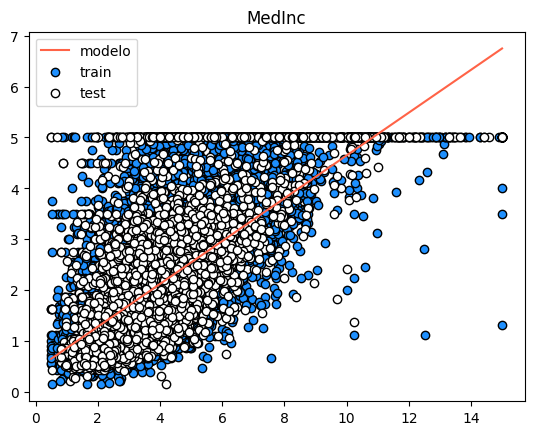

In [13]:
# 4. Graficar acá. Ayuda:
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
plt.plot(x, model.predict(x), color="tomato", label="modelo")

plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.title(feature)
plt.legend()
plt.show()

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

train_errors = []
test_errors = []
degrees = range(1, 20)

for degree in degrees:
    # 1. Instanciar y entrenar una regresión polinomial
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train_f, y_train)

    # 2. Predecir y calcular error en entrenamiento y evaluación
    y_train_pred = model.predict(X_train_f)
    y_test_pred = model.predict(X_test_f)

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    print(f"Grado del polinomio: {degree}")
    print(f"Error cuadrático medio en entrenamiento: {mse_train}")
    print(f"Error cuadrático medio en evaluación: {mse_test}")
    print()

    # 3. Guardar los errores en una lista
    train_errors.append(mse_train)
    test_errors.append(mse_test)




Grado del polinomio: 1
Error cuadrático medio en entrenamiento: 0.6960681099171515
Error cuadrático medio en evaluación: 0.7214982234014604

Grado del polinomio: 2
Error cuadrático medio en entrenamiento: 0.6894859202345499
Error cuadrático medio en evaluación: 0.7174074205923542

Grado del polinomio: 3
Error cuadrático medio en entrenamiento: 0.6782140838210796
Error cuadrático medio en evaluación: 0.7081355393674348

Grado del polinomio: 4
Error cuadrático medio en entrenamiento: 0.6780518857896085
Error cuadrático medio en evaluación: 0.7080431289121547

Grado del polinomio: 5
Error cuadrático medio en entrenamiento: 0.6780050101806554
Error cuadrático medio en evaluación: 0.7079724319207519

Grado del polinomio: 6
Error cuadrático medio en entrenamiento: 0.6760874470470534
Error cuadrático medio en evaluación: 0.7067678778891782

Grado del polinomio: 7
Error cuadrático medio en entrenamiento: 0.6737153167658615
Error cuadrático medio en evaluación: 0.7025961077966177

Grado del pol

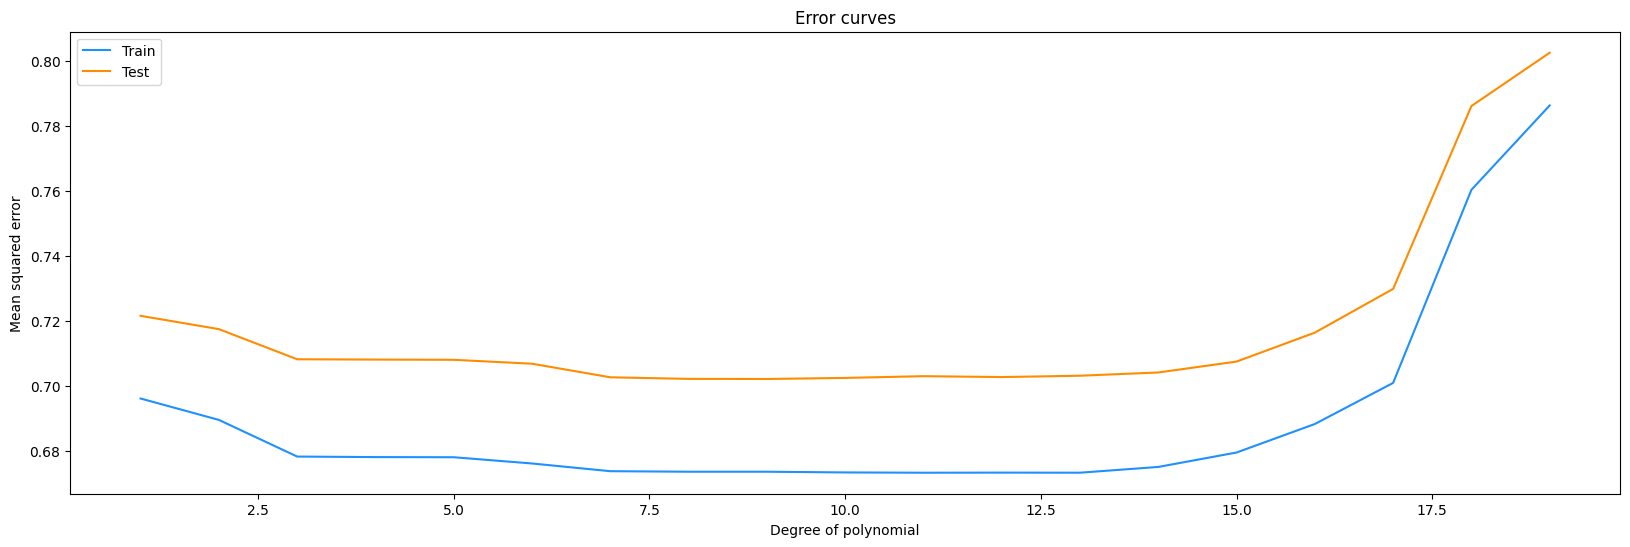

Podemos observar que el error de entrenamiento disminuye a medida que aumenta el grado del polinomio. Sin embargo, el error de evaluación disminuye hasta cierto punto y luego comienza a aumentar, lo que indica un sobreajuste a partir de ese punto.


In [15]:
# 2. Graficar curvas de error acá.


plt.figure(figsize=(20, 6))
plt.plot(degrees, train_errors, color="dodgerblue", label="Train")
plt.plot(degrees, test_errors, color="darkorange", label="Test")
plt.xlabel("Degree of polynomial")
plt.ylabel("Mean squared error")
plt.title("Error curves")
plt.legend()
plt.show()

# Interprete la curva
print("Podemos observar que el error de entrenamiento disminuye a medida que aumenta el grado del polinomio. Sin embargo, el error de evaluación disminuye hasta cierto punto y luego comienza a aumentar, lo que indica un sobreajuste a partir de ese punto.")

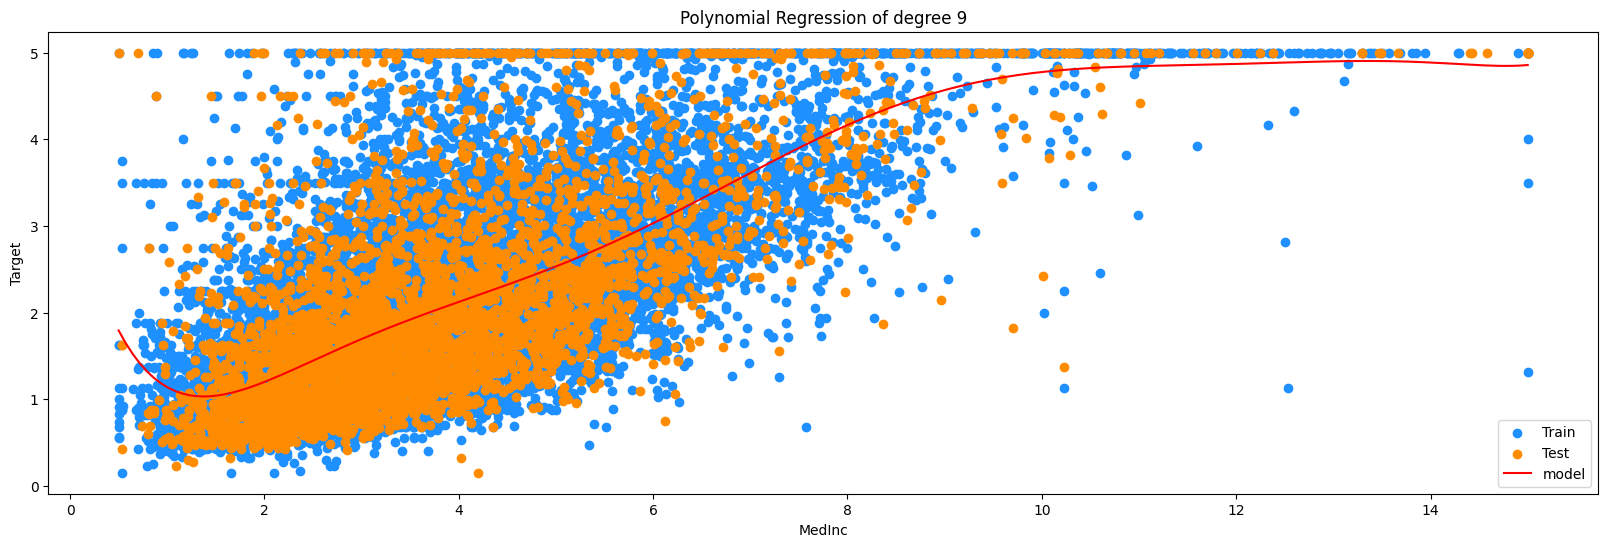

El modelo de regresión polinomial de mejor rendimiento tiene un grado de 9 . Se ajusta bastante bien a los datos, pero puede haber cierto grado de sobreajuste, ya que el error de prueba es mayor que el error de entrenamiento.


In [16]:
# 6. Seleccionamos el modelo que mejor funcione y grafique el modelo junto con los puntos
best_degree = test_errors.index(min(test_errors)) + 1
best_model = make_pipeline(PolynomialFeatures(best_degree), LinearRegression())
best_model.fit(X_train_f, y_train)
y_train_pred = best_model.predict(X_train_f)
y_test_pred = best_model.predict(X_test_f)

plt.figure(figsize=(20, 6))
plt.scatter(X_train_f, y_train, color="dodgerblue", label="Train")
plt.scatter(X_test_f, y_test, color="darkorange", label="Test")
plt.plot(x, best_model.predict(x.reshape(-1, 1)), color="red", label="model")
plt.xlabel(feature)
plt.ylabel('Target')
plt.title(f'Polynomial Regression of degree {best_degree}')
plt.legend()
plt.show()

# 7. Interprete el resultado
print("El modelo de regresión polinomial de mejor rendimiento tiene un grado de", best_degree, ". Se ajusta bastante bien a los datos, pero puede haber cierto grado de sobreajuste, ya que el error de prueba es mayor que el error de entrenamiento.")

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

In [17]:
# 1. Resolver acá. Ayuda (con dos atributos):
selector = np.isin(california['feature_names'], ['AveRooms', 'MedInc'])


X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((16512, 2), (4128, 2))

In [24]:
# 2. Resolver acá.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

train_errors = []
test_errors = []
degrees = range(1, 10)

for degree in degrees:
    # 1. Instanciar y entrenar una regresión polinomial
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train_fs, y_train)

    # 2. Predecir y calcular error en entrenamiento y evaluación
    y_train_pred = model.predict(X_train_fs)
    y_test_pred = model.predict(X_test_fs)

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    print(f"Grado del polinomio: {degree}")
    print(f"Error cuadrático medio en entrenamiento: {mse_train}")
    print(f"Error cuadrático medio en evaluación: {mse_test}")
    print()

    # 3. Guardar los errores en una lista
    train_errors.append(mse_train)
    test_errors.append(mse_test)


Grado del polinomio: 1
Error cuadrático medio en entrenamiento: 0.6890305711895537
Error cuadrático medio en evaluación: 0.7101927490883553

Grado del polinomio: 2
Error cuadrático medio en entrenamiento: 0.6655213598802162
Error cuadrático medio en evaluación: 0.6943082191575705

Grado del polinomio: 3
Error cuadrático medio en entrenamiento: 0.6359913311302113
Error cuadrático medio en evaluación: 0.654495360307988

Grado del polinomio: 4
Error cuadrático medio en entrenamiento: 0.6216004926735734
Error cuadrático medio en evaluación: 0.6377846780864285

Grado del polinomio: 5
Error cuadrático medio en entrenamiento: 0.61355980510263
Error cuadrático medio en evaluación: 0.6336725220724221

Grado del polinomio: 6
Error cuadrático medio en entrenamiento: 0.6094159535365569
Error cuadrático medio en evaluación: 0.6312087986528178

Grado del polinomio: 7
Error cuadrático medio en entrenamiento: 0.6069970478338431
Error cuadrático medio en evaluación: 0.6425195170446761

Grado del polino

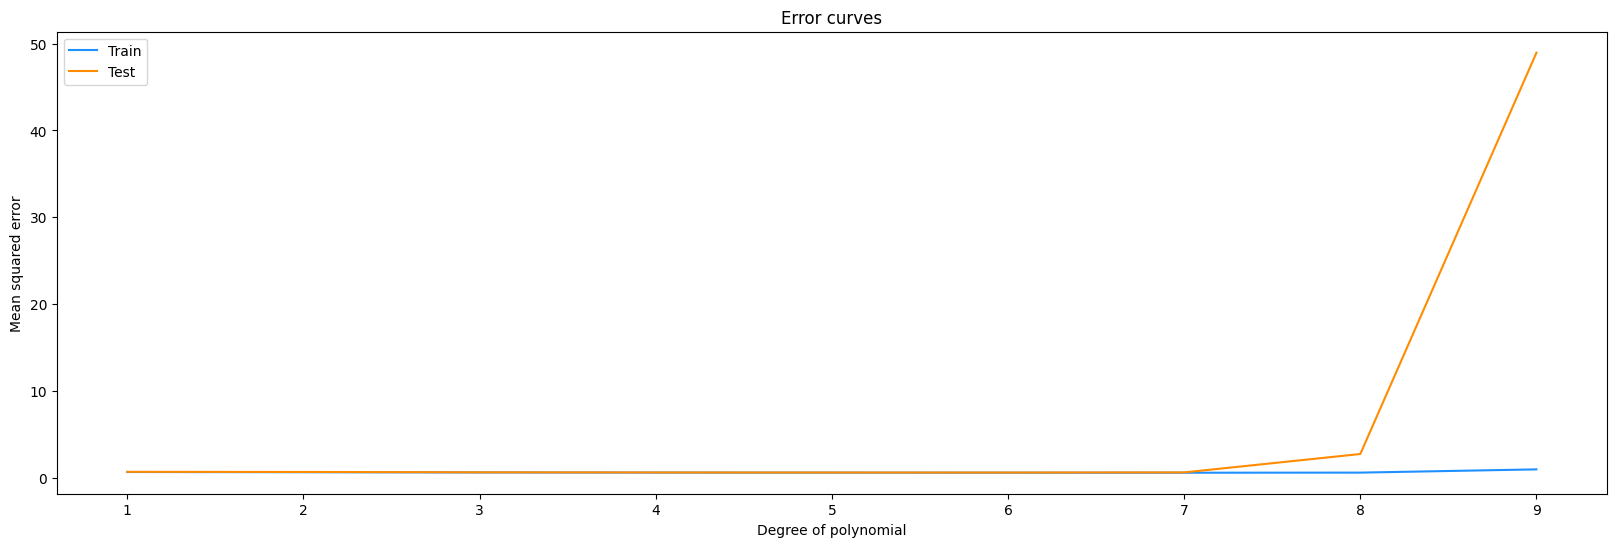

In [25]:
plt.figure(figsize=(20, 6))
plt.plot(degrees, train_errors, color="dodgerblue", label="Train")
plt.plot(degrees, test_errors, color="darkorange", label="Test")
plt.xlabel("Degree of polynomial")
plt.ylabel("Mean squared error")
plt.title("Error curves")
plt.legend()
plt.show()


In [20]:
# 6. Seleccionamos el modelo que mejor funcione y grafique el modelo junto con los puntos
best_degree = test_errors.index(min(test_errors)) + 1

# 7. Interprete el resultado
print("El modelo de regresión polinomial de mejor rendimiento tiene un grado de", best_degree)

El modelo de regresión polinomial de mejor rendimiento tiene un grado de 6


In [21]:
# 1. Instanciar y entrenar una regresión polinomial
degree = 6
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train_fs, y_train)

# 2. Predecir y calcular error en entrenamiento y evaluación
y_train_pred = model.predict(X_train_fs)
y_test_pred = model.predict(X_test_fs)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"Grado del polinomio: {degree}")
print(f"Error cuadrático medio en entrenamiento: {mse_train}")
print(f"Error cuadrático medio en evaluación: {mse_test}")
print()

# 3. Guardar los errores en una lista
train_errors.append(mse_train)
test_errors.append(mse_test)

Grado del polinomio: 6
Error cuadrático medio en entrenamiento: 0.6094159535365569
Error cuadrático medio en evaluación: 0.6312087986528178



Se obtuvo un mejor modelo porque tiene menor error que el modelo con un sólo feture. 0.61 vs 0.67.


## Más ejercicios (opcionales)

### Ejercicio 6: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

### Ejercicio 7: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?
